In [15]:
# LASSO Regularization (L1)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('dataset.csv')
X= dataset.drop(columns='Result')
Y= dataset['Result']
# X.head()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Scaling the data, as linear models benefits from feature scaling
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

# set the regularization parameter c=1
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7)

sel_ = SelectFromModel(logistic)
sel_.fit(scaler.transform(X_train.fillna(0)), Y_train)

sel_.get_support()

selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 9
selected features: 9
features with coefficients shrank to zero: 0


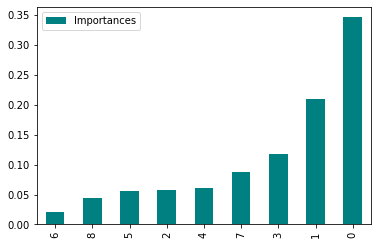

In [1]:
#Random Forest Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('dataset.csv')
X= dataset.drop(columns='Result')
Y= dataset['Result']
# X.head()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestClassifier(n_estimators=340)
model.fit(X_train,Y_train)

# get the importance of resulting features
importances = model.feature_importances_

# create a dataframe for vissualization
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order for better vissualization
final_df = final_df.sort_values('Importances')

final_df.plot.bar(color='teal')